In [12]:
import os
import re

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from utils import prepare_dataframe, df_to_np_arrays

In [ ]:
DATASET_DIR = "UTKFace"
IMG_DIM = 200
INPUT_SHAPE = (IMG_DIM, IMG_DIM, 3)

FIXED_KERNEL_SIZE = (3, 3)
MIN_DENSE_UNITS = 16
NUM_AGE_CLASSES = 12

df = prepare_dataframe(DATASET_DIR)

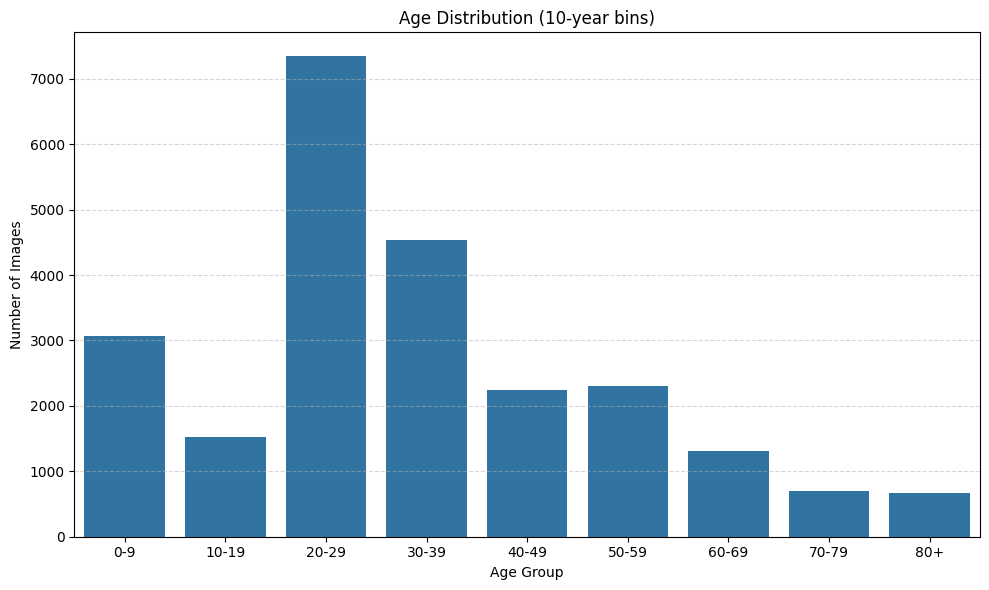

In [ ]:
# Define the bin edges
bins = list(range(0, 81, 10)) + [df['Age'].max() + 1]  # This adds a final upper bound for 80+

# Create bin labels (optional)
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)] + ['80+']

# Apply binning
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Bin', data=df, order=labels)  # use the custom bin labels
plt.title('Age Distribution (10-year bins)')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\39102132.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Label', data=df, palette='pastel')


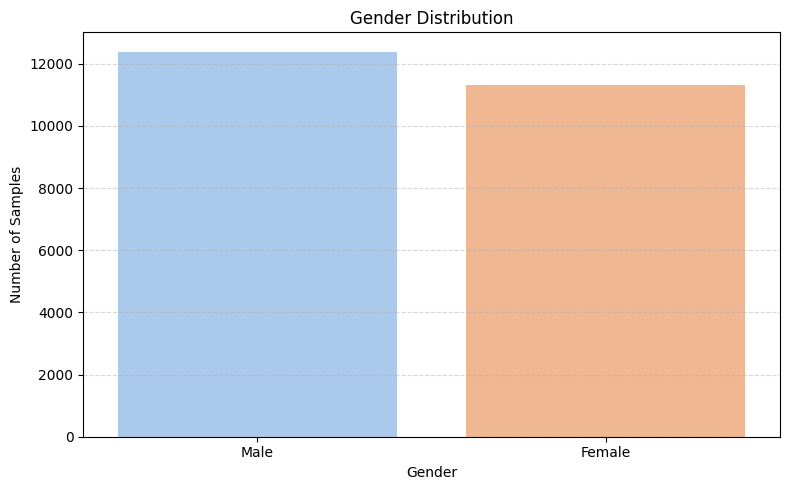

In [47]:
gender_labels = {0: 'Male', 1: 'Female'}
df['Gender_Label'] = df['Gender'].map(gender_labels)

plt.figure(figsize=(8, 5))
sns.countplot(x='Gender_Label', data=df, palette='pastel')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
max_count = df['Age_Bin'].value_counts().max()

df_balanced_age = df.groupby('Age_Bin').apply(
    lambda x: x.sample(max_count, replace=True, random_state=1)
    ).reset_index(drop=True)

C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\3506828483.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_balanced_age = df.groupby('Age_Bin').apply(
C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\3506828483.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_age = df.groupby('Age_Bin').apply(


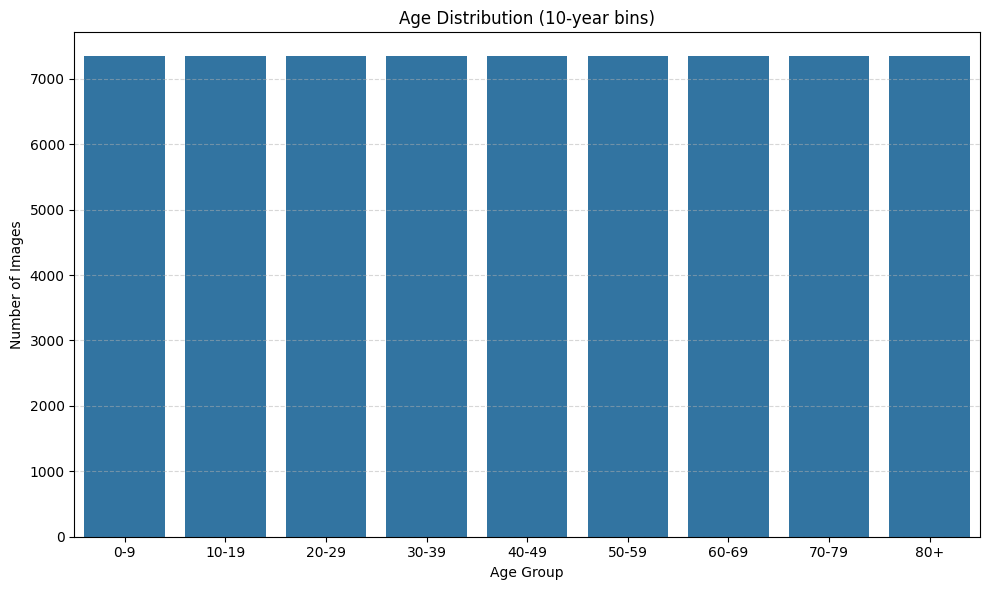

In [ ]:
# Define the bin edges
bins = list(range(0, 81, 10)) + [df_balanced_age['Age'].max() + 1]  # This adds a final upper bound for 80+

# Create bin labels (optional)
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)] + ['80+']

# Apply binning
df_balanced_age['Age_Bin'] = pd.cut(df_balanced_age['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Bin', data=df_balanced_age, order=labels)  # use the custom bin labels
plt.title('Age Distribution (10-year bins)')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [29]:
# Find files missing ethnicity label (implemented in utils.prepare_dataset())

pattern = re.compile(r'^(\d+)_(\d)_(\d)_\d{16}')
bad_files = []

for file in os.listdir(DATASET_DIR):
    if file.endswith(".jpg"): 
        if not pattern.match(file):
            bad_files.append(file)
            print(f"File does not match expected format: {file}")

if not bad_files:
    print("All files match the expected format.")

File does not match expected format: 39_1_20170116174525125.jpg.chip.jpg
File does not match expected format: 61_1_20170109142408075.jpg.chip.jpg
File does not match expected format: 61_1_20170109150557335.jpg.chip.jpg


In [37]:
ethnicity_labels = {
    0: 'White',
    1: 'Black',
    2: 'Asian',
    3: 'Indian',
    4: 'Others'
}

df['Ethnicity_Label'] = df['Ethnicity'].map(ethnicity_labels)


C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\3076332739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity_Label', data=df, palette='pastel')


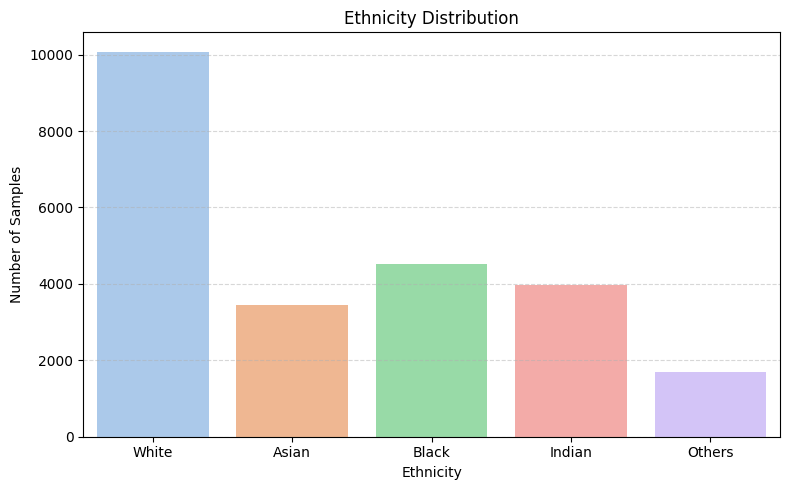

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ethnicity_Label', data=df, palette='pastel')

plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
max_count = df_balanced_age['Ethnicity'].value_counts().max()

df_balanced_age_race = df_balanced_age.groupby('Ethnicity').apply(
    lambda x: x.sample(max_count, replace=True, random_state=1)
    ).reset_index(drop=True)

C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\2362518001.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced_age_race = df_balanced_age.groupby('Ethnicity').apply(


C:\Users\maduj\AppData\Local\Temp\ipykernel_23992\3493700439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity_Label', data=df_balanced_age_race, palette='pastel')


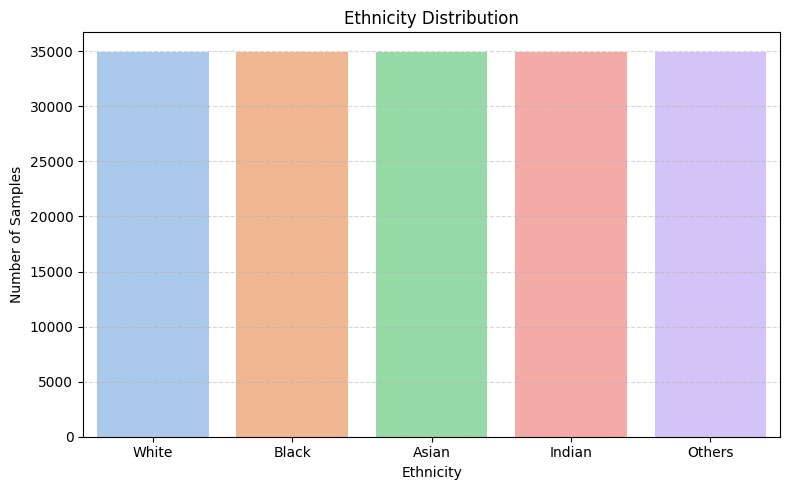

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ethnicity_Label', data=df_balanced_age_race, palette='pastel')

plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

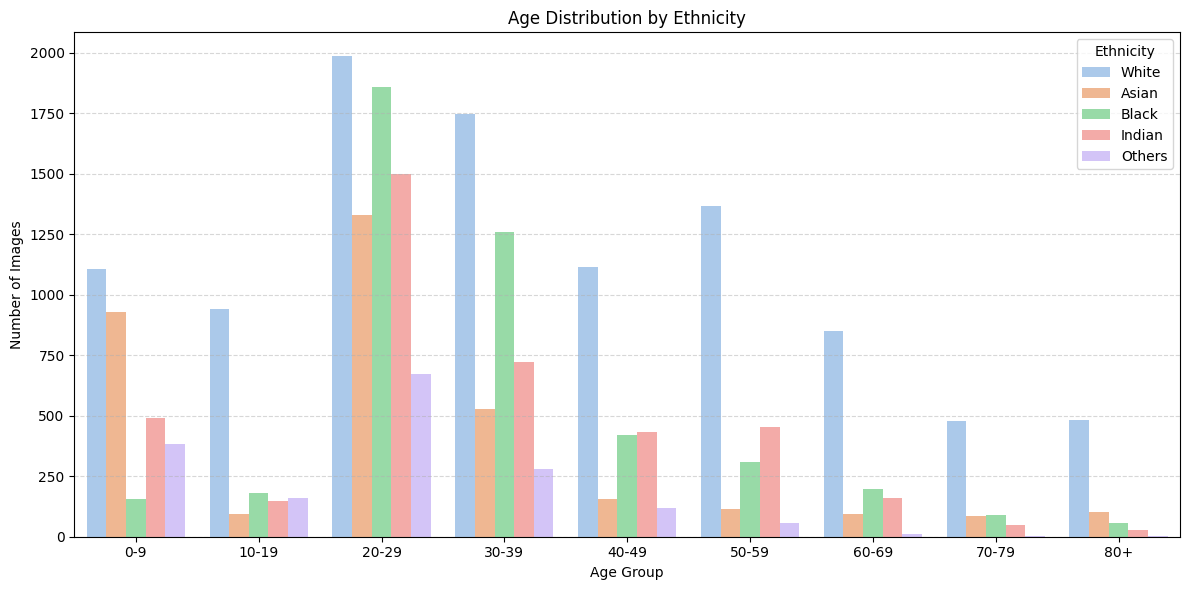

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Bin', hue='Ethnicity_Label', data=df, order=labels, palette='pastel')

plt.title('Age Distribution by Ethnicity')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.legend(title='Ethnicity')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

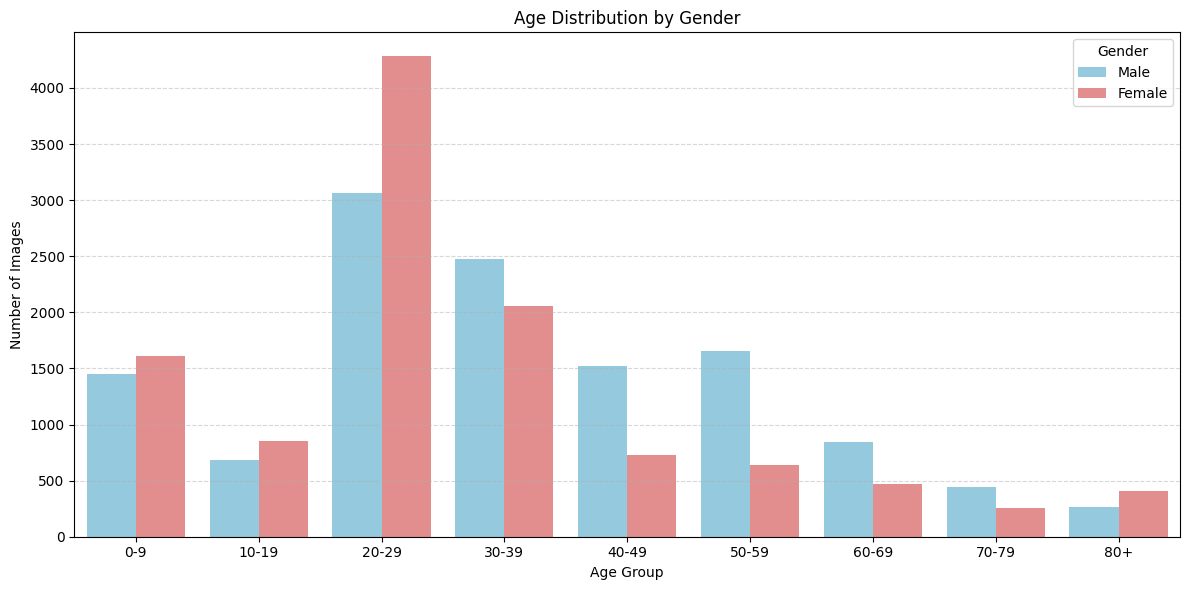

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Bin', hue='Gender_Label', data=df, order=labels,
              palette=['skyblue', 'lightcoral'])

plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()